In [1]:
import pandas as pd
from Utils_MSA import *
from os import listdir
import matplotlib.pyplot as plt

rcParams = {'font.size': 12 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

In [2]:
data_dir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/alignments/'
samples = listdir(data_dir)
d = {}
A_Alleles, B_Alleles, C_Alleles = [], [], []

for l in samples:
    seqs = Load_Fasta_Seqs(data_dir+l, MSA_Encoding=True)
    d.update(seqs)    

In [3]:
top_30_alleles = {'A':dict({}),'B':dict({}),'C':dict({})}

top_30_alleles_dir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/\
C_Allele_Relative_Abundance_Sep/BLAST_Comparison/BLAST_Hits/'
for a in ['A','B','C']:
    seqs = listdir(top_30_alleles_dir+a+'_Alleles')
    for s in seqs:
        if s.startswith("."):
            continue
        s = s.replace(a+"_allele1","").replace(a+"_allele","").replace(a+"p_allele","")
        T = s.split('_')
        top_30_alleles[a][T[0]+'_'+T[1]] = "_".join(T[3:])[:-1]

In [4]:
d_PW = {}
strains = ['A', 'B', 'C']
window = 150
for i in range(len(strains)):
    for j in range(i+1, len(strains)):
        dist = []
        keys = top_30_alleles[strains[i]]
        for k in keys:
            S1 = d[top_30_alleles[strains[i]][k]]
            S2 = d[top_30_alleles[strains[j]][k]]
            for l in range(0, min(len(S1), len(S2))-window):
                distance = Compute_Pairwise_Distances(S1[l:l+window], S2[l:l+window], normalized=False)
                dist.append(distance)
        d_PW[strains[i]+strains[j]]=dist

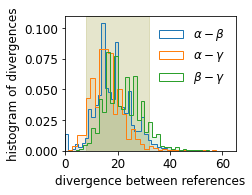

In [50]:
outpath = '/Users/harihara/Research-Activities/Plots/Hot_Spring_Plots/Single_Cell_Analyses/'

plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,1, figsize = (3.43,0.8*3.43))
ax.hist(d_PW['AB'], bins = 35, histtype = 'step', color = 'C0', label = r'$\alpha-\beta$', density = True)
ax.hist(d_PW['AB'], bins = 35, color = 'C0', histtype = 'stepfilled',density = True, alpha = 0.1)

ax.hist(d_PW['AC'], bins = 35, histtype = 'step', color = 'C1', label = r'$\alpha-\gamma$', density = True)
ax.hist(d_PW['AC'], bins = 35, color = 'C1', histtype = 'stepfilled', alpha = 0.1, density = True)

ax.hist(d_PW['BC'], bins = 35, histtype = 'step', color = 'C2', label = r'$\beta-\gamma$', density = True)
ax.hist(d_PW['BC'], bins = 35, color = 'C2', histtype = 'stepfilled', alpha = 0.1, density = True)

ax.set_xlim([0, 65])
ax.axvspan(np.percentile(d_PW['AB']+d_PW['AC']+d_PW['BC'], 5), 
           np.percentile(d_PW['AB']+d_PW['AC']+d_PW['BC'],95), color = 'olive', alpha = 0.2)
ax.set_xlabel('divergence between references')
ax.set_ylabel('histogram of divergences')
ax.legend(frameon = False)
fig.tight_layout()

fig.savefig(outpath+'Divergence-Distribution.pdf')

In [ ]:
np.percentile(d_PW['AB']+d_PW['AC']+d_PW['BC'], 5)

In [ ]:
np.percentile(d_PW['AB']+d_PW['AC']+d_PW['BC'], 95)